In [8]:
%matplotlib inline
import caffe
import numpy as np
from matplotlib import pyplot as plt
caffe.set_mode_gpu()

In [10]:
CFnet = './net.prototxt'
CFweight = './weight.caffemodel.h5'
CFmean = './mean.npy'
net = caffe.Net(CFnet, CFweight,1)
mean = np.load(CFmean)

In [11]:
target_label = 4
current = np.random.rand(3,32,32)*255 - mean[0]
act_hist = []
rate_obj = 1500
rate_smooth = 0.1
IT = 1000

In [ ]:
plt.rcParams['figure.figsize'] = (20,20)
fg = plt.figure()
def showCurrent(current, index):
    image = (current+mean[0]).transpose(1,2,0)
    image = image - image.min()
    image = image/image.max()
    sb = fg.add_subplot(10,10,index)
    sb.imshow(image)
    sb.set_title(index)
#start to train
for i in range(1,IT+1):
    # basic backward
    net.blobs['data'].data[...] = current
    miss = net.forward(end='ip2')['ip2'].flat[target_label]
    act_hist.append(miss)
    net.blobs['ip2'].diff[...].flat = (np.arange(10)==target_label)-0.5
    diff = net.backward(start='ip2')['data']
    # regularzation
    x_diff = np.zeros_like(current)
    y_diff = np.zeros_like(current)
    if np.random.rand() > 0.5:
        y_diff[:,1:,:] = (current[:,1:,:] - current[:,:-1,:])
        x_diff[:,:,1:] = (current[:,:,1:] - current[:,:,:-1])
    else:
        y_diff[:,:-1,:] = (-current[:,1:,:] + current[:,:-1,:])
        x_diff[:,:,:-1] = (-current[:,:,1:] + current[:,:,:-1])
    # gradient descent
    current = current + rate_obj*diff[0] - rate_smooth*x_diff - rate_smooth*y_diff
    # print info
    if i%100 == 0:
        print 'iteration={}'.format(i)
        showCurrent(current, i/100)

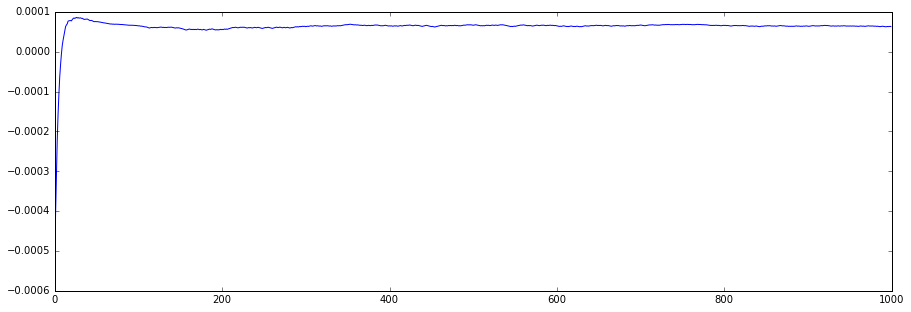

In [6]:
plt.rcParams['figure.figsize'] = (15,5)
plt.plot(act_hist)

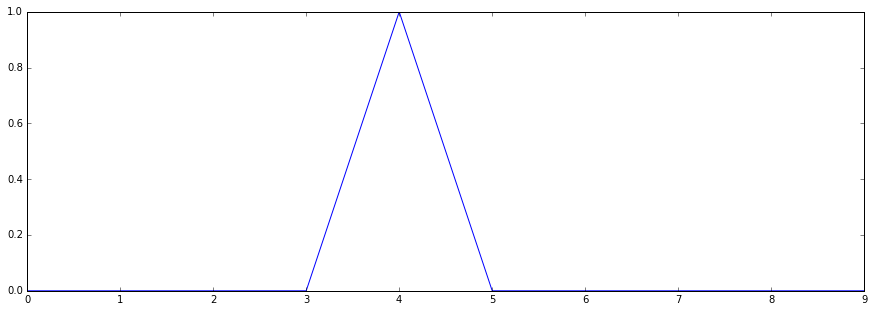

In [86]:
plt.plot(net.forward(end='loss')['loss'].flat)

In [7]:
net.blobs

OrderedDict([('data', <caffe._caffe.Blob at 0x7fd4ec7cd7d0>),
             ('conv1', <caffe._caffe.Blob at 0x7fd4ec7cd488>),
             ('pool1', <caffe._caffe.Blob at 0x7fd4ec7cd140>),
             ('norm1', <caffe._caffe.Blob at 0x7fd4ed4328c0>),
             ('conv2', <caffe._caffe.Blob at 0x7fd4ed432848>),
             ('pool2', <caffe._caffe.Blob at 0x7fd4ed432320>),
             ('norm2', <caffe._caffe.Blob at 0x7fd4ed4322a8>),
             ('conv3', <caffe._caffe.Blob at 0x7fd4ec7e80c8>),
             ('pool3', <caffe._caffe.Blob at 0x7fd4ec8aeb90>),
             ('ip2', <caffe._caffe.Blob at 0x7fd4ed3f2de8>),
             ('loss', <caffe._caffe.Blob at 0x7fd4ed3f2f50>)])